# Elasticity Problems with Analytic Solution
```
Mauricio Aristizabal Cano
Universidad EAFIT
May 14 2019
```

## Introduction
These analytic solutions are taken from Timochenko's theory of elasticity book.

The shear modulus is given by:
$$
G = \displaystyle{\frac{E}{2(1+\nu)}}
$$

## 1. Bending of a Cantilever Loaded at the End.
The stress field is given by:

$$
\begin{array}{rcl}
\sigma_x &=& -P\displaystyle{\frac{xy}{I}}\\
\sigma_y &=& 0\\
\tau_{xy} &=& -
\displaystyle{ 
\frac{P}{2 I} (c^2-y^2) 
}\\
\end{array}
$$

The strains are given by

$$
\begin{array}{rcl}
\epsilon_x &=& -P\displaystyle{\frac{xy}{EI}}\\
\epsilon_y &=& -\nu P \displaystyle{\frac{xy}{EI}}\\
\gamma_{xy} &=& -
\displaystyle{ 
\frac{P}{2 I G} (c^2-y^2) 
}\\
\end{array}
$$


The deformation
$$
u=\displaystyle{
-\frac{Px^2y}{2EI}
-\frac{\nu P y^3}{6EI}
+\frac{P y^3}{6IG}
+\left(
 \frac{l^2}{E}
-\frac{c^2}{G}
\right)\frac{Py}{2I}
}
$$

$$
v=\displaystyle{
\left(
\frac{\nu xy^2}{2}
+\frac{ x^3}{6}
-\frac{ l^2 x}{2}
+\frac{ l^3}{3}
\right)\frac{P}{EI}
}
$$


In [1]:
material = {}

E = 210e9 # GPa
nu = 0.3  # 
G = E/( 2.0*( 1.0 + nu ) )

material['E']  = E 
material['nu'] = nu 
material['G']  = G


beam = {}

c =  1.0
l = 10.0
I = 2.0*c**3/3.0

beam['c'] = c
beam['l'] = l
beam['I'] = I

P = 10

In [2]:
def deformation(x,y,P,material,beam):
    c = beam['c']
    l = beam['l']
    I = beam['I']
    
    E  = material['E']   
    nu = material['nu']   
    G  = material['G']  
    v = ( nu*x*y**2/2.0 + x**3/6.0 - l**2*x/2.0 + l**3/3.0 )*(P/(E*I))
    u = -P*x**2*y/(2.0*E*I)-nu*P*y**3/(6.0*E*I)+P*y**3/(6.0*I*G)+(l**2/E-c**2/G)*P*y/(2.0*I)
    return (u,v)




def stress(x,y,P,material,beam):
    c = beam['c']
    l = beam['l']
    I = beam['I']
    
    E  = material['E']   
    nu = material['nu']   
    G  = material['G']  
    
    
    sigma_x = -P*x*y/I
    sigma_y = 0.0*x*y
    tau_xy = -P/(2.0*I)*(c**2-y**2) 
    
    return (sigma_x,sigma_y,tau_xy)






def strain(x,y,P,material,beam):
    c = beam['c']
    l = beam['l']
    I = beam['I']
    
    E  = material['E']   
    nu = material['nu']   
    G  = material['G']  
    
    epsilon_x = -P*x*y/(E*I)
    epsilon_y = -nu*P*x*y/(E*I)
    gamma_xy  = -P/(2.0*I*G)*(c**2-y**2) 
    
    return (epsilon_x,epsilon_y,gamma_xy)
    

In [3]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
x = np.arange(0,l+1e-10,0.5)
y = np.arange(-c,c+1e-10,0.1)

X,Y =  np.meshgrid(x,y)

In [4]:
y

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00])

<IPython.core.display.Javascript object>


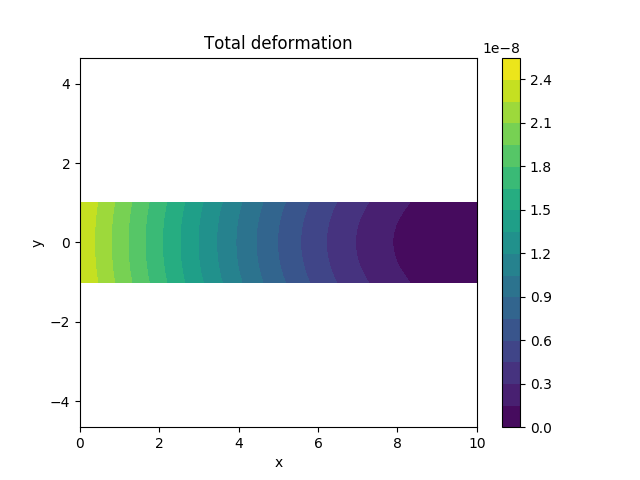

In [5]:
U,V = deformation(X,Y,P,material,beam)

plt.figure()
plt.contourf(X,Y,np.sqrt(U**2+V**2),levels=20)
plt.axis('equal')
plt.title('Total deformation')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


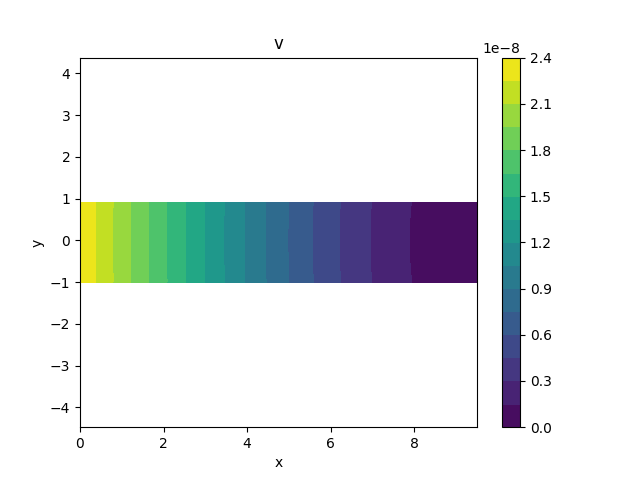

In [45]:
plt.figure()
plt.contourf(X,Y,V,levels=20)
plt.axis('equal')
plt.title('v')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


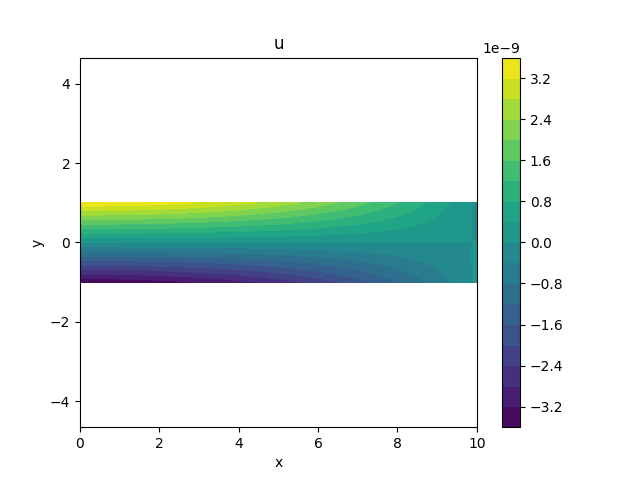

In [6]:
plt.figure()
plt.contourf(X,Y,U,levels=20)
plt.axis('equal')
plt.title('u')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


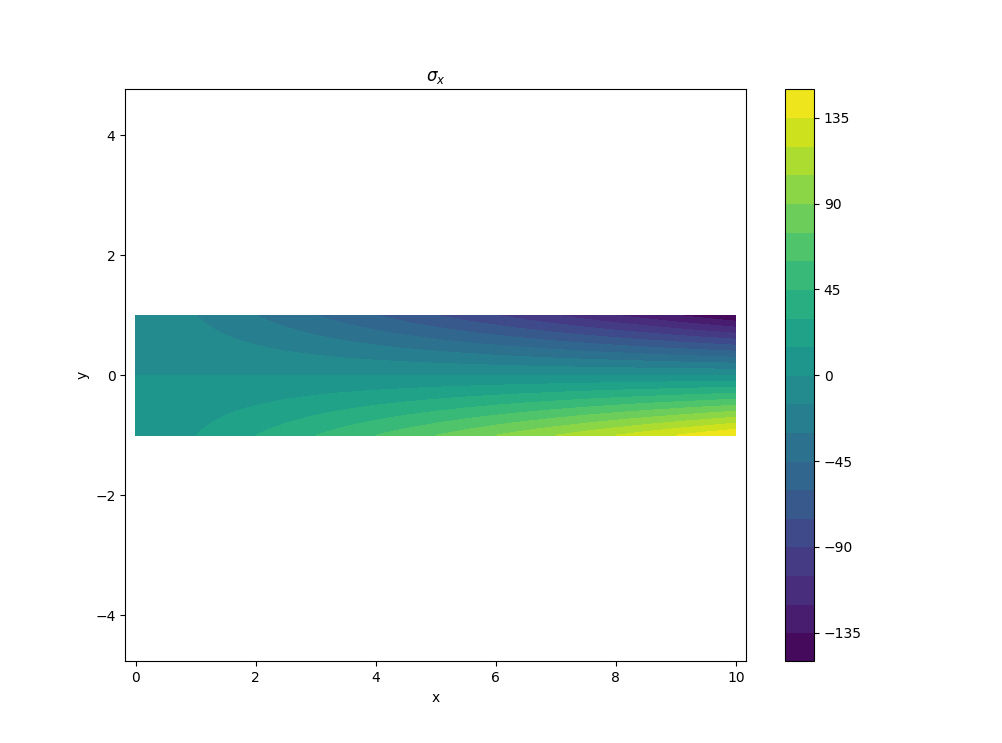

In [8]:
sx, sy, txy = stress(X,Y,P,material,beam)

plt.figure()
plt.contourf(X,Y,sx,levels=20)
plt.axis('equal')
plt.title('$\sigma_x$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


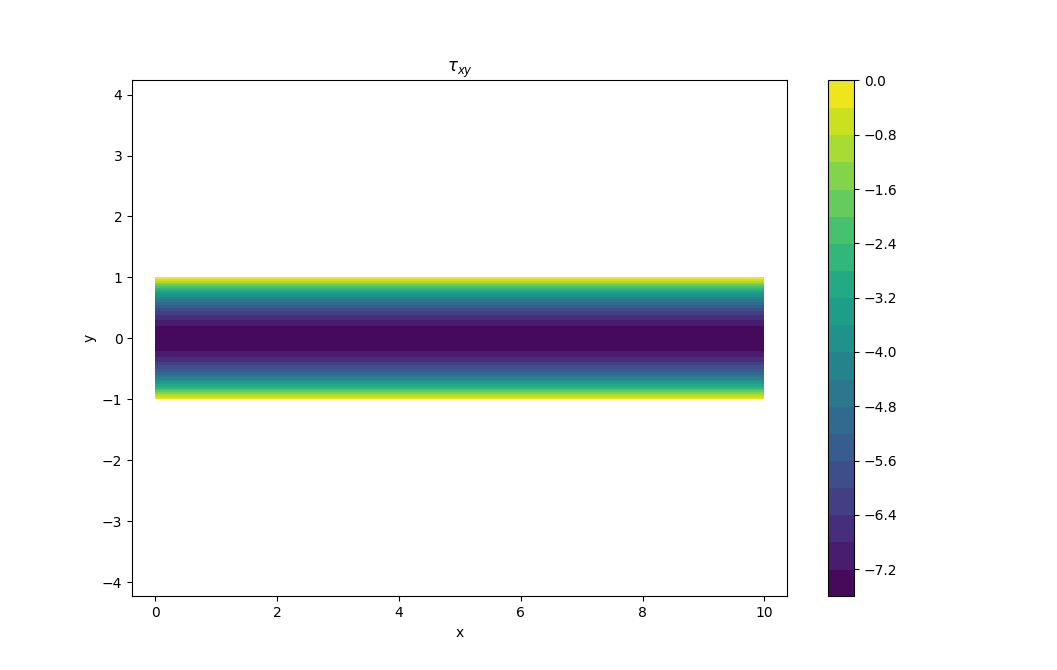

In [9]:
plt.figure()
plt.contourf(X,Y,txy,levels=20)
plt.axis('equal')
plt.title(r'$\tau_{xy}$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

In [28]:
import sympy as sym
sym.init_printing()
Es, nus, xs, ys, Ps, cs, ls, Is, Gs = sym.symbols("E nu x y P c l, I, G")

Iss = 2*cs**3/3
Gss = Es/(2*(1+nus))

In [29]:
Gs

In [30]:
sigma_xs = -Ps*xs*ys/Is
sigma_ys = 0*Es 
tau_xys  = -Ps/(2*Is)*(cs**2-ys**2)

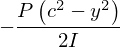

In [31]:
tau_xys

In [54]:
us = -Ps*xs**2*ys/(2*Es*Is)-nus*Ps*ys**3/(6*Es*Is)+Ps*ys**3/(6*Gs*Is)+(Ps*ls**2/(2*Es*Is)-Ps*cs**2/(2*Gs*Is))*ys
us = us.replace(Gs,Gss).replace(Is,Iss)
dudEs  = us.diff(Es)
dudnus = us.diff(nus)

u_func = sym.utilities.lambdify((Es, nus, xs, ys, Ps, cs, ls),us,'numpy')
dudE_func = sym.utilities.lambdify((Es, nus, xs, ys, Ps, cs, ls),dudEs,'numpy')
dudnu_func = sym.utilities.lambdify((Es, nus, xs, ys, Ps, cs, ls),dudnus,'numpy')

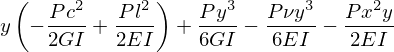

In [50]:
us

In [52]:
vs = nus*Ps*xs*ys**2/(2*Es*Is)+Ps*xs**3/(6*Es*Is)-Ps*ls**2*xs/(2*Es*Is)+Ps*ls**3/(3*Es*Is)
vs = vs.replace(Gs,Gss).replace(Is,Iss)
dvdEs  = vs.diff(Es)
dvdnus = vs.diff(nus)
v_func = sym.utilities.lambdify((Es, nus, xs, ys, Ps, cs, ls),vs,'numpy')
dvdE_func = sym.utilities.lambdify((Es, nus, xs, ys, Ps, cs, ls),dvdEs,'numpy')
dvdnu_func = sym.utilities.lambdify((Es, nus, xs, ys, Ps, cs, ls),dvdnus,'numpy')

In [55]:
U = u_func(E, nu, X, Y, P, c, l)
V = v_func(E, nu, X, Y, P, c, l)
dudE = dudE_func(E, nu, X, Y, P, c, l)
dudnu = dudnu_func(E, nu, X, Y, P, c, l)
dvdE = dvdE_func(E, nu, X, Y, P, c, l)
dvdnu = dvdnu_func(E, nu, X, Y, P, c, l)

<IPython.core.display.Javascript object>


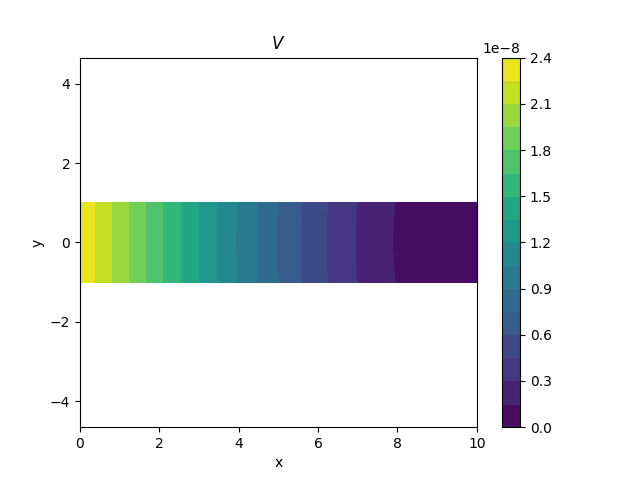

In [42]:
plt.figure()
plt.contourf(X,Y,V,levels=20)
plt.axis('equal')
plt.title(r'$V$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


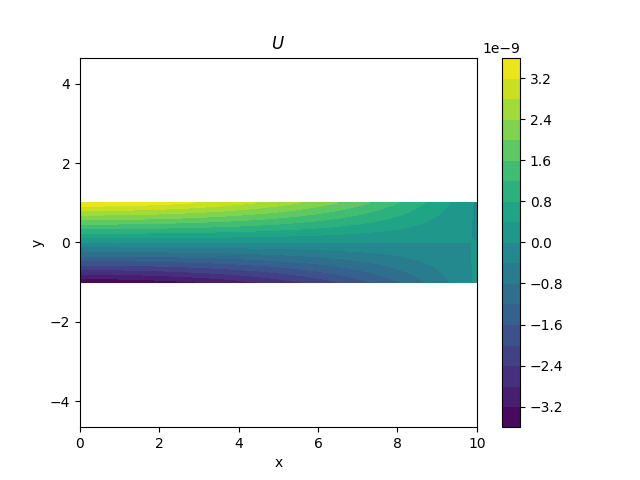

In [56]:
plt.figure()
plt.contourf(X,Y,U,levels=20)
plt.axis('equal')
plt.title(r'$U$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


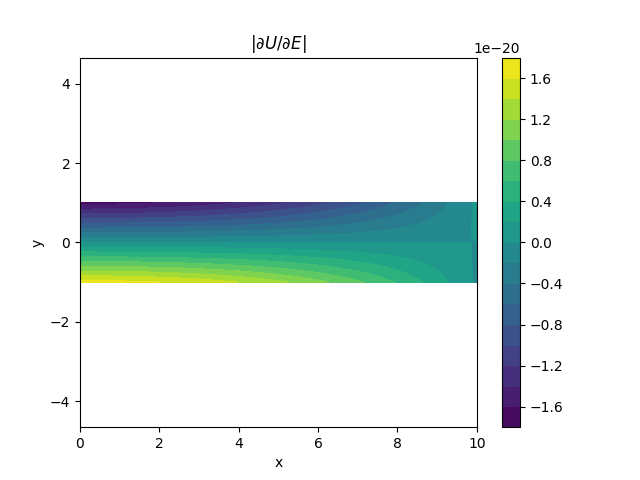

In [64]:
plt.figure()
plt.contourf(X,Y,dudE,levels=20)
plt.axis('equal')
plt.title(r'$|\partial U / \partial E|$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


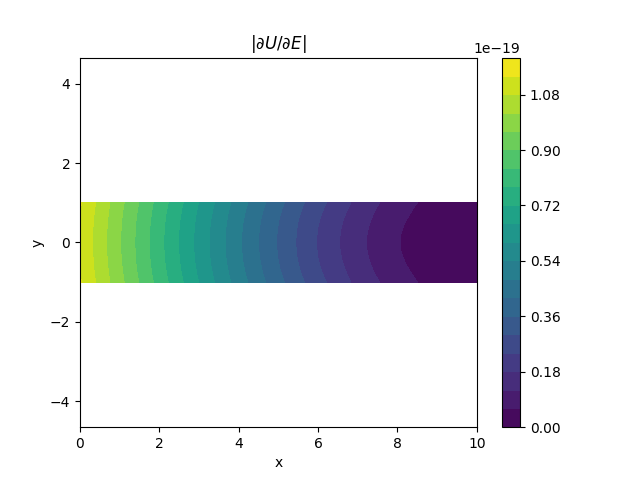

In [61]:
plt.figure()
plt.contourf(X,Y,np.sqrt(dvdE**2+dudE**2),levels=20)
plt.axis('equal')
plt.title(r'$|\partial U / \partial E|$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


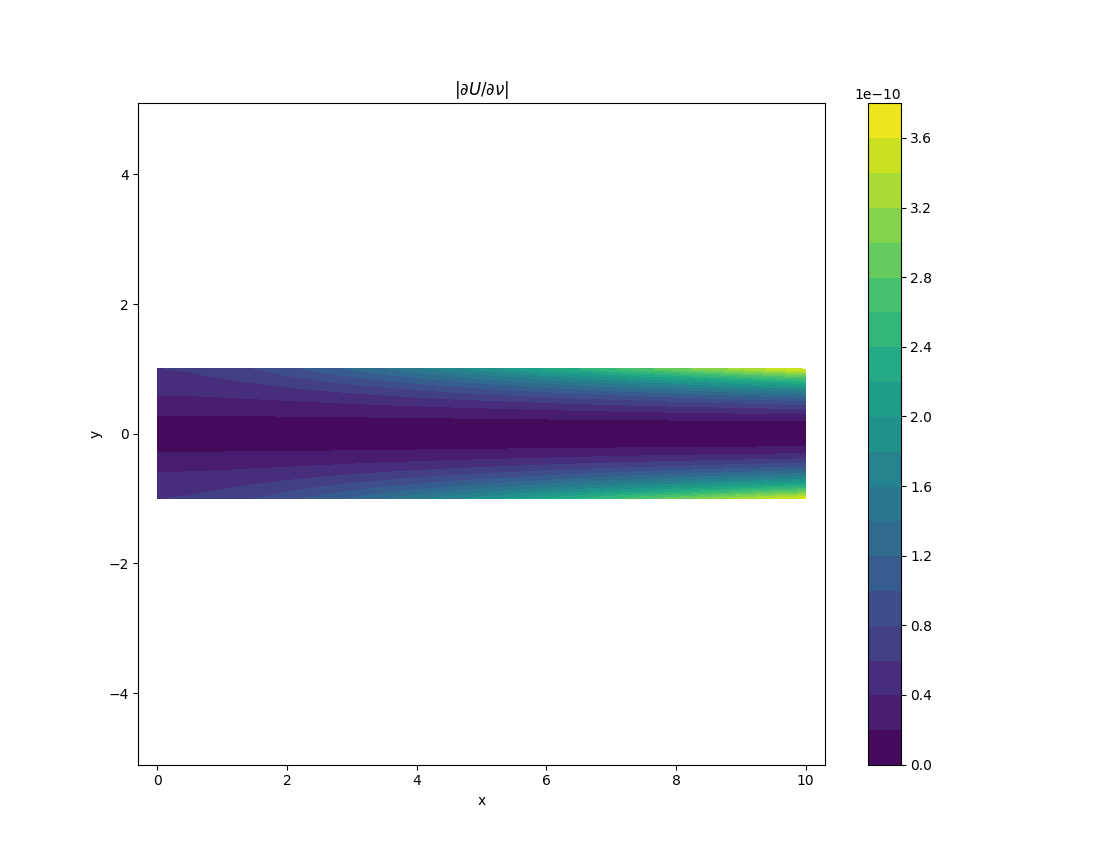

In [62]:
plt.figure()
plt.contourf(X,Y,np.sqrt(dvdnu**2+dudnu**2),levels=20)
plt.axis('equal')
plt.title(r'$|\partial U / \partial \nu|$')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()